In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt

from data_cleaning_improved import *
from data_cleaning import *
from main_algorithm import *
from functions import *
from msm_functions import *
from evaluation import *

def plot_results(lsh_results, lsh_results_old, msm_results):
    
    # Convert results to a DataFrame for easier plotting
    df_lsh = pd.DataFrame(lsh_results)
    df_lsh_old = pd.DataFrame(lsh_results_old)

    # Sort the DataFrame by fraction_comparisons for proper line plotting
    df_lsh = df_lsh.sort_values(by='fraction_comparisons')
    df_lsh_old = df_lsh_old.sort_values(by='fraction_comparisons')

    # Convert results to a DataFrame for easier plotting
    df_msm = pd.DataFrame(msm_results)

    # Sort the DataFrame by fraction_comparisons for proper line plotting
    df_msm = df_msm.sort_values(by='fraction_comp')

    plt.figure(figsize=(7, 6))

    # Plot PC vs Fraction Comparisons
    plt.subplot(2, 2, 1)
    plt.plot(df_lsh['fraction_comparisons'], df_lsh['pc'], c='black', label='Turbo MSMP+')
    plt.plot(df_lsh_old['fraction_comparisons'], df_lsh_old['pc'], c='grey', linestyle='--', label='MSMP+')
    plt.xlabel('Fraction of Comparisons', fontsize=8)
    plt.ylabel('PC', fontsize=8)
    plt.title(r'$\mathbf{Fig. 1.}$ Pair Completeness', fontsize=9, loc='left')
    plt.legend(fontsize=8)

    # Plot PQ vs Fraction Comparisons
    plt.subplot(2, 2, 2)
    plt.plot(df_lsh['fraction_comparisons'], df_lsh['pq'], c='black', label='Turbo MSMP+')
    plt.plot(df_lsh_old['fraction_comparisons'], df_lsh_old['pq'], c='grey', linestyle='--',label='MSMP+')
    plt.xlabel('Fraction of Comparison', fontsize=8)
    plt.ylabel('PQ', fontsize=8)
    plt.title(r'$\mathbf{Fig. 2.}$ Pair Quality', fontsize=9, loc='left')
    plt.legend(fontsize=8)

    # Plot F1* vs Fraction Comparisons
    plt.subplot(2, 2, 3)
    plt.plot(df_lsh['fraction_comparisons'], df_lsh['f1_star'], c='black', label='Turbo MSMP+')
    plt.plot(df_lsh_old['fraction_comparisons'], df_lsh_old['f1_star'], c='grey', linestyle='--',label='MSMP+')
    plt.xlabel('Fraction of Comparison', fontsize=8)
    plt.ylabel('F1*', fontsize=8)
    plt.title(r'$\mathbf{Fig. 3.}$ F1*', fontsize=9, loc='left')
    plt.legend(fontsize=8)

    # Plot F1 vs Fraction Comparisons
    plt.subplot(2, 2, 4)
    plt.plot(df_msm['fraction_comp'], df_msm['F1'], c='black', label='Turbo MSMP+')
    plt.axhline(y=0.49, color='red', linestyle=':', linewidth=1, label='Baseline')  # Horizontal line
    # Set the maximum values for the axes
    plt.xlim(-0.032, 1)  # Set x-axis range from 0 to 1
    plt.ylim(0.12, 0.71)  # Set y-axis range from 0 to 0.8
    plt.xlabel('Fraction of Comparison', fontsize=8)
    plt.ylabel('F1', fontsize=8)
    plt.title(r'$\mathbf{Fig. 4.}$ F1 (after clustering)', fontsize=9, loc='left')
    plt.legend(fontsize=8)

    plt.tight_layout()
    plt.show()

# Open JSON file
file_name = 'TVs-all-merged.json'
data = open_json(file_name)

# Clean Data
final_data = clean_data_new(data, patterns=patterns,completeness=0.5)
old_data = clean_data_old(data)

tuning_parameters = [0.1, 0.3, 0.5, 0.75, 0.9] 
gamma, alpha, beta, mu, delta, epsilon_TMWM = 0.7, 0.5, 0.2, 0.5, 0.6, 0
number_bootstrap = 5
ratio = 0.63
seed=42

band_rows_combinations = [(300, 2), (150, 4), (100, 6), (75, 8), (50, 12), (40, 15), (30, 20), (20, 30), (15, 40), (10, 60)]

In [ ]:
# Get Results
lsh_results = bootstrap_samples_lsh(final_data, ratio, number_bootstrap, band_rows_combinations,seed)
lsh_results_old = bootstrap_samples_lsh(old_data, ratio, number_bootstrap, band_rows_combinations,seed)

msm_results = bootstrap_samples_msm(final_data, ratio, number_bootstrap, band_rows_combinations, tuning_parameters, alpha, beta, gamma, mu, delta, epsilon_TMWM, seed)

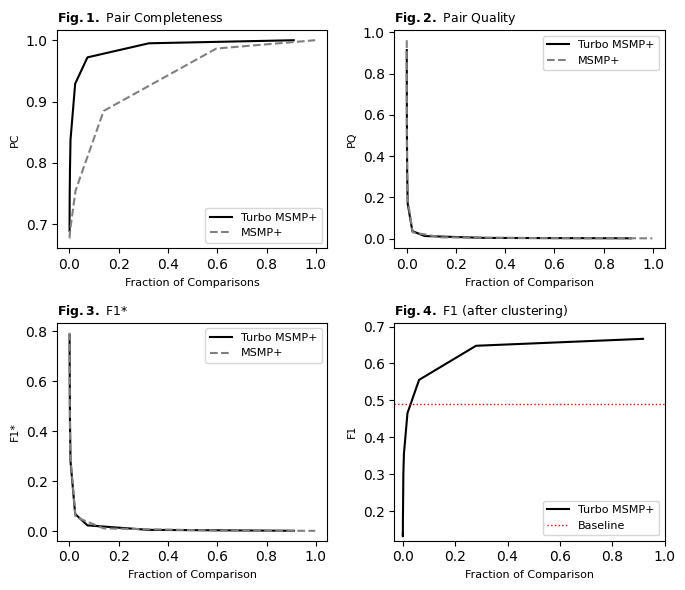

In [11]:
# Plot Results
plot_results(lsh_results,lsh_results_old, msm_results)